In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.kernel_ridge import *
from sklearn.svm import *

In [2]:
df=pd.read_csv('googleplaystore.csv', encoding = "ISO-8859-1")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#eliminate duplicates for "App" 
df= df.drop_duplicates(subset = 'App', keep = 'first')
print(df.shape)
df.head()

(9660, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#drop the Column "Genres", cause it is similar to "Category"
df.drop('Genres', axis= 1, inplace= True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(9660, 12)

In [6]:
#count missing vaues in each column
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#drop rows with missing value
df = df.dropna(how = 'any')
df.shape

(8190, 12)

In [8]:
#check data types
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
#Rating distribution
df['Rating'].describe()

count    8190.000000
mean        4.173321
std         0.536691
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [10]:
#Start deal with "category" column
df.Category.value_counts()

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [11]:
#Start deal with "Installs" column
df.Installs.value_counts()

1,000,000+        1414
100,000+          1094
10,000+            986
10,000,000+        937
1,000+             696
5,000,000+         607
500,000+           503
50,000+            456
5,000+             424
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

In [12]:
#Rating distribution
df['Installs'].describe()

count           8190
unique            19
top       1,000,000+
freq            1414
Name: Installs, dtype: object

In [13]:
#Start deal with "Type" column
df.Type.value_counts()

Free    7588
Paid     602
Name: Type, dtype: int64

# Changing Categorical Variables into Numeric

### Columns - Size & Installs

In [14]:
len(df[df.Size == 'Varies with device'])
# change it to NA first

df['Size'].replace('Varies with device', np.nan, inplace = True ) 
df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
            df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

In [15]:
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))


In [16]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,"June 20, 2018",1.1,4.4 and up


In [17]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Column - Reviews

In [18]:
# convert to int

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [19]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Column - Price

In [20]:
df['Price'].value_counts().head(30)

0          7588
$2.99       109
$0.99       103
$4.99        68
$1.99        59
$3.99        52
$1.49        30
$2.49        20
$5.99        14
$9.99        14
$6.99        11
$399.99      11
$4.49         9
$14.99        8
$3.49         7
$7.99         7
$8.99         4
$12.99        4
$19.99        4
$29.99        4
$11.99        3
$7.49         2
$5.49         2
$24.99        2
$10.99        2
$16.99        2
$1.00         2
$1.70         2
$10.00        2
$17.99        2
Name: Price, dtype: int64

In [21]:
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [22]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Column - Category

In [23]:
df.Category = pd.Categorical(df.Category)

In [24]:
df['Category_num'] = df.Category.astype('category').cat.codes

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Category_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,0


In [26]:
df.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Last Updated        object
Current Ver         object
Android Ver         object
Category_num          int8
dtype: object

In [27]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

# Visualization 

### Rating

Text(0.5,1,'Distribution of Rating')

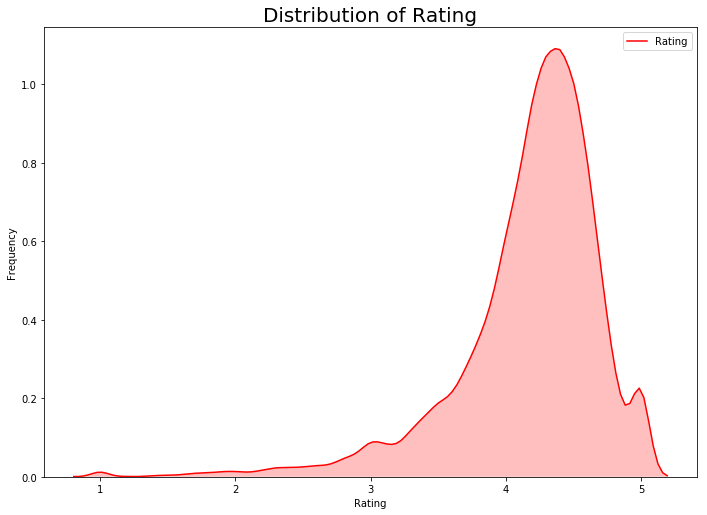

In [28]:
#Area chart for distribution
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

##### Finding: Rating of 4.5 has the highest frequency in Google Play Store. 
##### The average rating is around 4, which is high.

### Category

In [29]:
print( len(df['Category'].unique()) , "categories")

print("\n", df['Category'].unique())

33 categories

 [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, BUSINESS, ..., PARENTING, WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION]
Length: 33
Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION]


Text(0.5,1,'Count of app in each category')

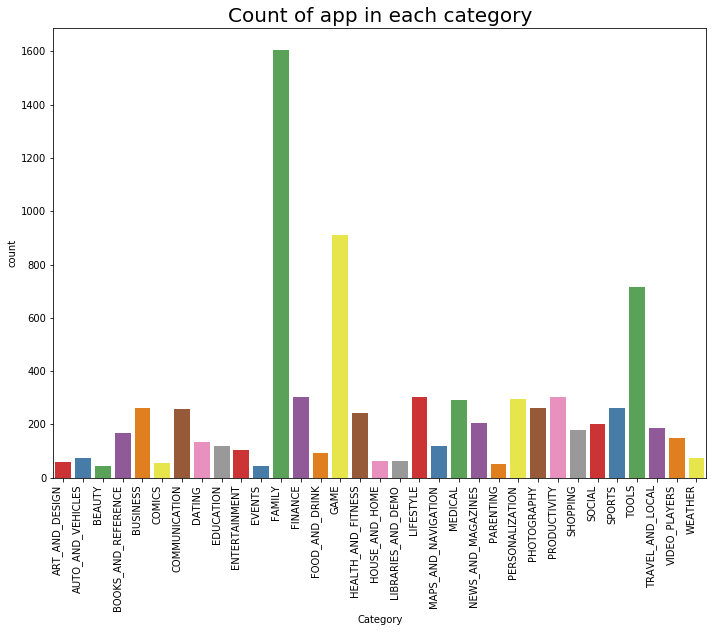

In [30]:
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

##### Finding: Application in category of "Family", "Game", and "Tools" have highest counts in Google Play Store.

### Review

In [31]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

Text(0.5,1,'Distribution of Reveiw')

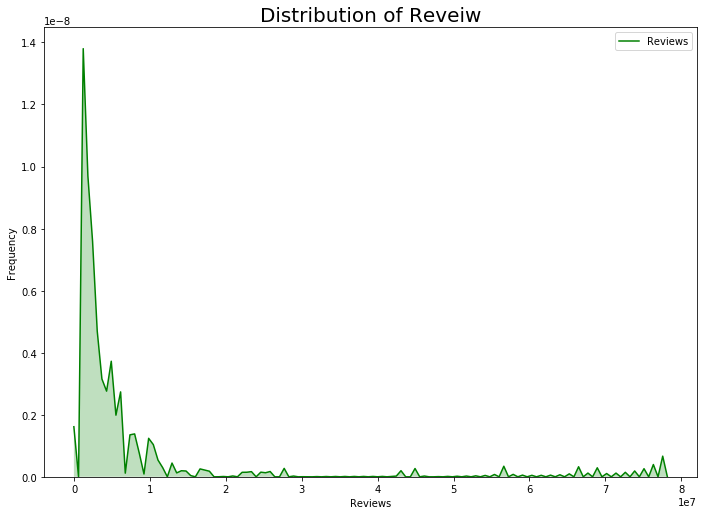

In [32]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

##### Findings: Most of application in Google Play Store have less than 1M reviews.

### Type

In [33]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

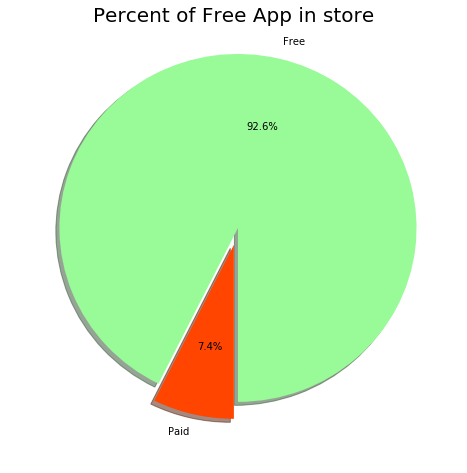

In [34]:
#Pie chart to show the percentage
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

##### Finding: 92.6% application in Google Play Store is free. 7.6% application are paid.

In [35]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [36]:
df['Price'].value_counts().head(30)

0.00      7588
2.99       109
0.99       103
4.99        68
1.99        59
3.99        52
1.49        30
2.49        20
5.99        14
9.99        14
399.99      11
6.99        11
4.49         9
14.99        8
7.99         7
3.49         7
29.99        4
8.99         4
19.99        4
12.99        4
11.99        3
1.70         2
10.00        2
1.00         2
24.99        2
7.49         2
10.99        2
16.99        2
17.99        2
5.49         2
Name: Price, dtype: int64

In [37]:
df_price = df.loc[df['Price'] > 0]

Text(0.5,1,'Count of paid app in each price')

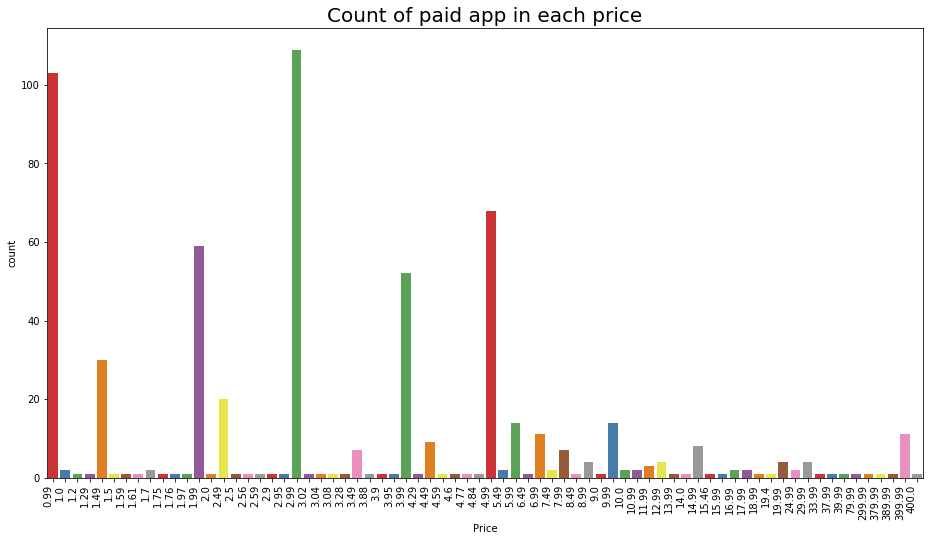

In [38]:
rcParams['figure.figsize'] = 15.7,8.27
g = sns.countplot(x=df_price['Price'],data=df_price, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of paid app in each price',size = 20)

### Install

Text(0.5,1,'Distribution of Install')

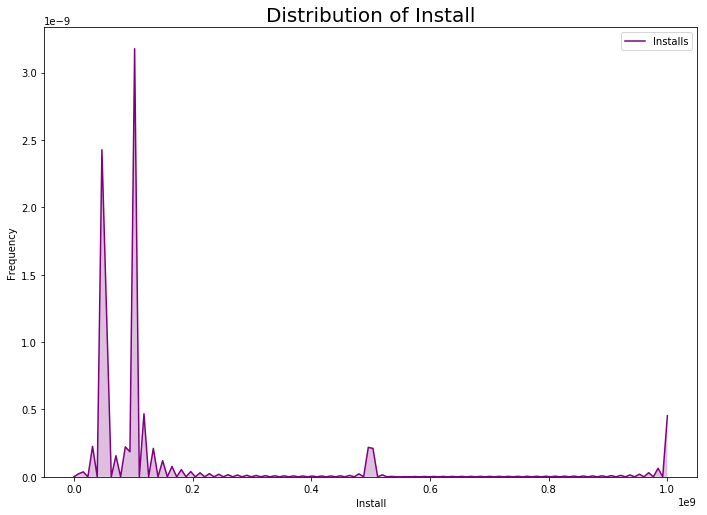

In [39]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Installs, color="Purple", shade = True)
g.set_xlabel("Install")
g.set_ylabel("Frequency")
plt.title('Distribution of Install',size = 20)

# correlation matrix

In [40]:
df_t = df[['Rating', 'Reviews','Size','Installs','Price','Category_num']]
df_t.head()

,Rating,Reviews,Size,Installs,Price,Category_num
0,4.1,159,19000000.0,10000,0.0,0
1,3.9,967,14000000.0,500000,0.0,0
2,4.7,87510,8700000.0,5000000,0.0,0
3,4.5,215644,25000000.0,50000000,0.0,0
4,4.3,967,2800000.0,100000,0.0,0


In [41]:
df_t.dtypes

Rating          float64
Reviews           int64
Size            float64
Installs          int64
Price           float64
Category_num       int8
dtype: object

In [42]:
df_part = df_t.loc[df['Reviews'] < 1000000]
df_part.shape

(7841, 6)

In [43]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import  matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

/Users/Xueqing/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


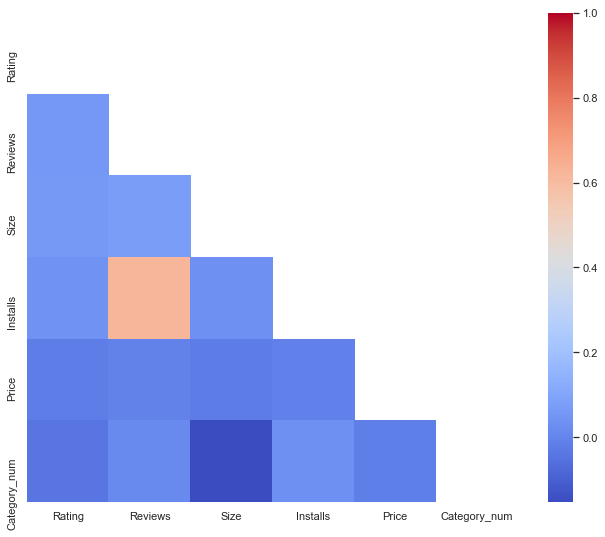

In [44]:
import seaborn as sns

# Compute the correlation matrix

corr = df_t.corr()
sns.set(style="whitegrid")

# Generate a mask for the upper triangle
mask_ur = np.zeros_like(corr, dtype=np.bool)
mask_ur[np.triu_indices_from(mask_ur)] = True

# Set up the figure
fig_corr, axs_corr = plt.subplots(figsize=(11,9))

# Draw the heatmap with mask
sns.heatmap(corr, mask=mask_ur, cmap="coolwarm")

Text(0.5,1,'Rating VS Reveiws')

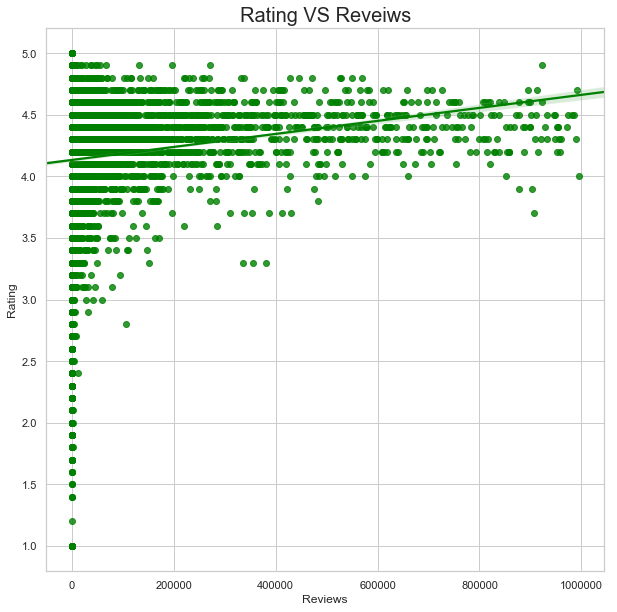

In [45]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'Green',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

##### Most of application in this store have less than 1M in reviews.
##### Seem like well-known application will get a good rating

Text(0.5,1,'Rating VS Installs')

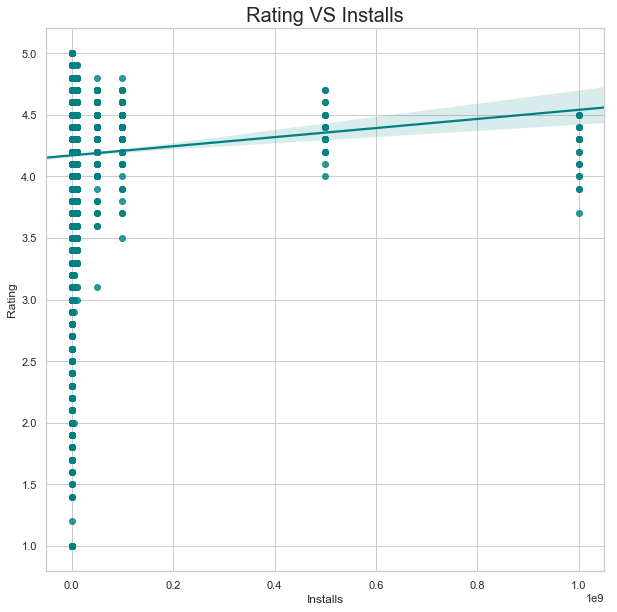

In [46]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=df_t);
plt.title('Rating VS Installs',size = 20)

##### Seem like number of install little affect to rating

Text(0.5,1,'Rating VS Size')

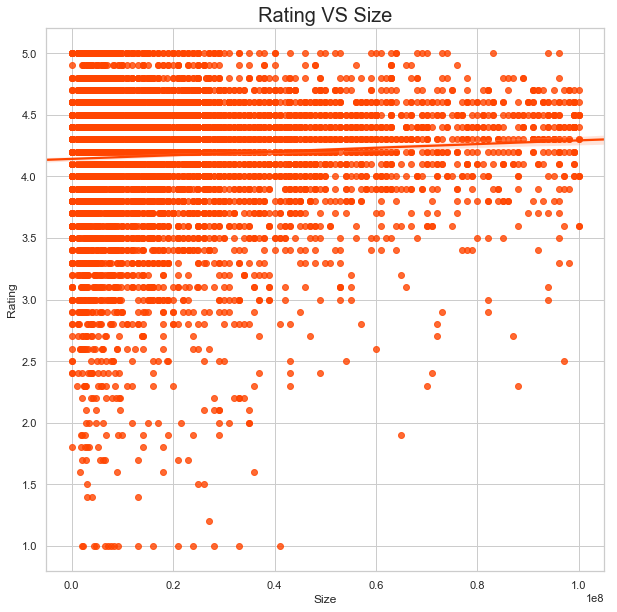

In [47]:
plt.figure(figsize = (10,10))
sns.regplot(x="Size", y="Rating", color = 'orangered',data=df_t);
plt.title('Rating VS Size',size = 20)

##### Seem like number of size little affect to rating

Text(0.5,1,'Boxplot of Rating VS Category')

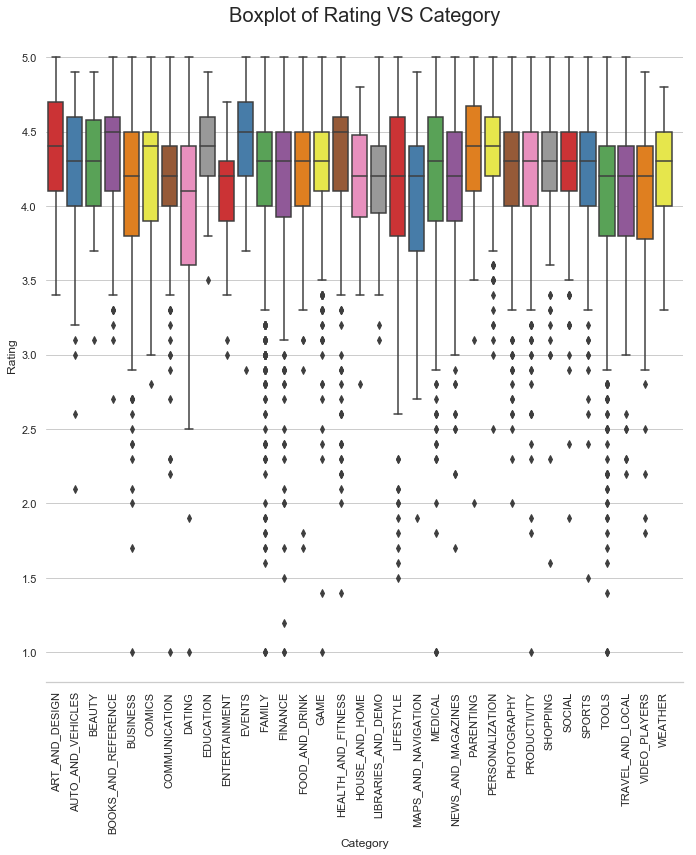

In [48]:
#Boxplot for outlines
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

##### Finding: Rating of each category is not different too much.

# Regression analysis

In [49]:
#to add into results_index for evaluation of error term 
from sklearn import metrics
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

resultsdf = pd.DataFrame()

In [50]:
X = df_t.values[:, 1:5]
Y = df_t.values[:,0]

In [51]:
# split dataset with train & test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [52]:
# for high rating
#For Rating > 4
df_part = df_t.loc[df['Rating'] > 4]
df_part = df_part.loc[df['Reviews'] < 1000000]
df_part.shape

(5429, 6)

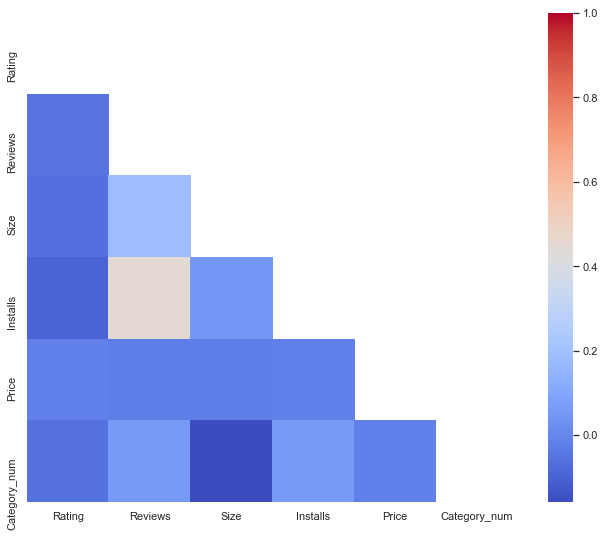

In [53]:

# Compute the correlation matrix

corr = df_part.corr()
sns.set(style="whitegrid")

# Generate a mask for the upper triangle
mask_ur = np.zeros_like(corr, dtype=np.bool)
mask_ur[np.triu_indices_from(mask_ur)] = True

# Set up the figure
fig_corr, axs_corr = plt.subplots(figsize=(11,9))

# Draw the heatmap with mask
sns.heatmap(corr, mask=mask_ur, cmap="coolwarm")

In [54]:
Xp = df_part.values[:, 1:5]
Yp = df_part.values[:,0]

In [55]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split( Xp, Yp, test_size = 0.3, random_state = 100)

# Linear Regression

In [56]:
#Linear Regression

In [57]:
ln = LinearRegression().fit(X_train, y_train)
ln.score(X_train, y_train)

0.008256671900475854

In [58]:
result1 = ln.predict(X_test)

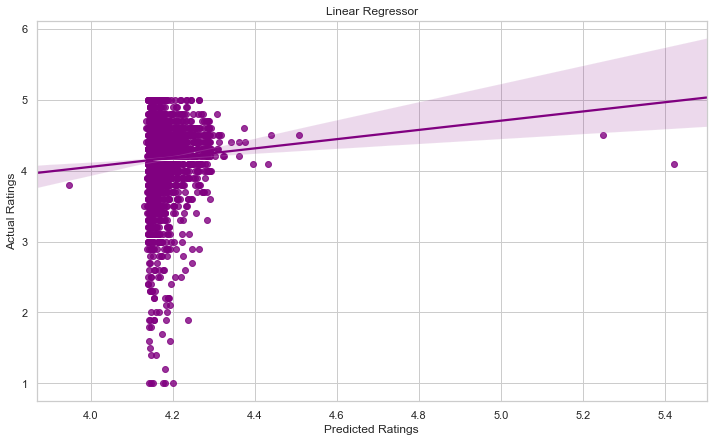

In [59]:
plt.figure(figsize=(12,7))
sns.regplot(result1,y_test,color='purple')
plt.title('Linear Regressor')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [60]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,result1, name = 'Linear Regressor'),ignore_index = True)
resultsdf

,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Series Name
0,0.380414,0.297918,0.015127,Linear Regressor


### For high rating

In [61]:
ln = LinearRegression().fit(Xp_train, yp_train)
ln.score(Xp_train, yp_train)

0.012036716732855335

In [62]:
result1b = ln.predict(Xp_test)

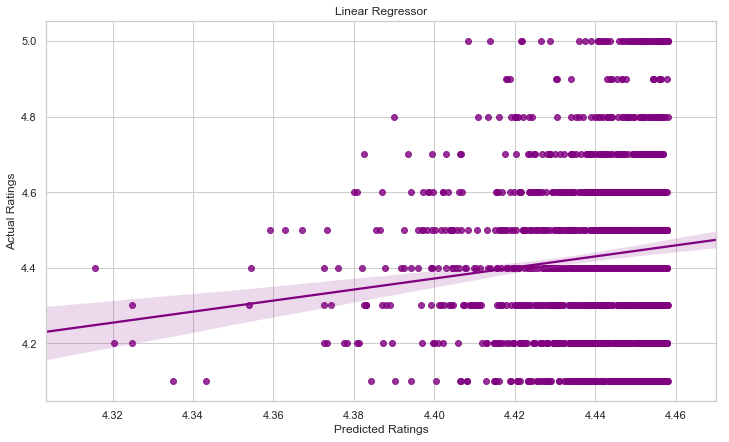

In [63]:
plt.figure(figsize=(12,7))
sns.regplot(result1b,yp_test,color='purple')
plt.title('Linear Regressor')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [64]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(yp_test,result1b, 
                                                   name = 'Linear Regressor - High Rating'),ignore_index = True)
resultsdf

,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Series Name
0,0.380414,0.297918,0.015127,Linear Regressor
1,0.194916,0.056444,0.001875,Linear Regressor - High Rating


#### The mean accuracy value is very low, so move to next one.

# Decision Tree Regression

In [65]:
#decision Tree
regr1 = DecisionTreeRegressor(random_state = 100, max_depth=8, min_samples_leaf=4)
regr1.fit(X_train,y_train)
print ("Training score:%f"%(regr1.score(X_train,y_train)))
#print ("Test score:%f"%(regr1.score(X_test,y_test)))

Training score:0.213346


In [66]:
y_1 = regr1.predict(X_test)

In [67]:
d = {'col1': y_test, 'col2': y_1}

In [68]:
df_a = pd.DataFrame(data=d)
df_a['index_col'] = df_a.index

In [69]:
df_a

,col1,col2,index_col
0,4.2,4.260000,0
1,3.8,4.105536,1
2,4.3,4.566667,2
3,4.4,4.600000,3
4,4.4,3.997376,4
5,1.9,4.022802,5
6,3.7,4.175862,6
7,3.1,4.022802,7
8,4.5,4.064516,8
9,4.5,4.175862,9


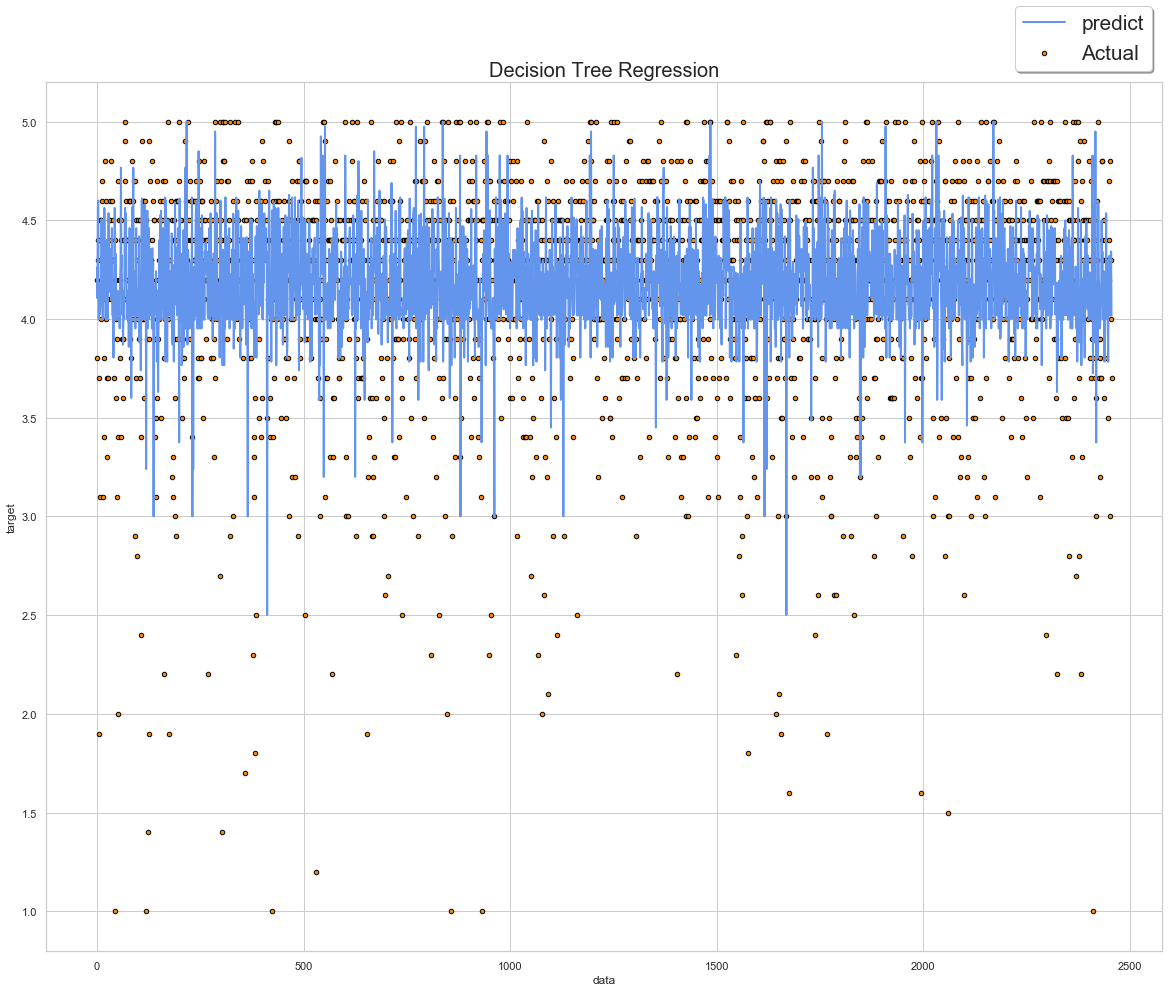

In [70]:
plt.figure(figsize=(20, 16))
plt.scatter(df_a['index_col'], y_test, s=20, edgecolor="black",
            c="darkorange", label="Actual")
plt.plot(df_a['index_col'], y_1, color="cornflowerblue",
         label="predict", linewidth=2)
#plt.plot(df_a['index_col'], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression", size = 20)
plt.legend(fontsize = 'xx-large',loc = 'lower right', shadow=True, bbox_to_anchor=(1, 1))
plt.show()


In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
mean_squared_error(y_test, y_1)

0.27410238511509655

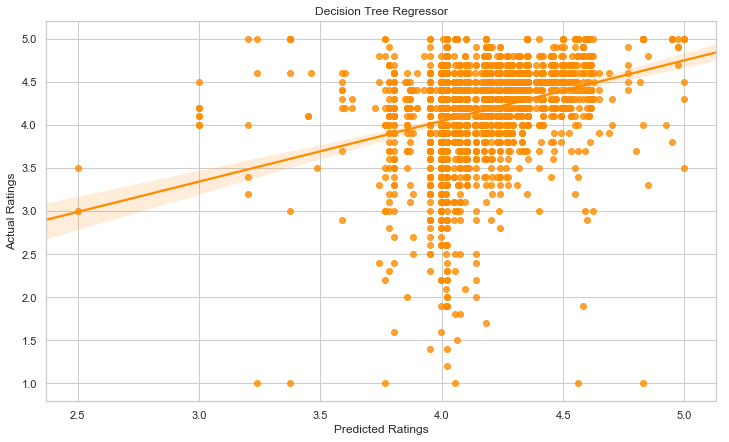

In [73]:
plt.figure(figsize=(12,7))
sns.regplot(y_1,y_test,color='darkorange')
plt.title('Decision Tree Regressor')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [74]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,y_1, name = 'Decision Tree Regressor'),ignore_index = True)
resultsdf

,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Series Name
0,0.380414,0.297918,0.015127,Linear Regressor
1,0.194916,0.056444,0.001875,Linear Regressor - High Rating
2,0.361327,0.274102,0.014051,Decision Tree Regressor


#### For High Rating App

In [75]:
#decision Tree
regr_part = DecisionTreeRegressor(random_state = 100, max_depth=25, min_samples_leaf=3)
regr_part.fit(Xp_train,yp_train)
print ("Training score:%f"%(regr_part.score(Xp_train,yp_train)))
#print ("Test score:%f"%(regr_part.score(X_test,y_test)))

Training score:0.706502


In [76]:
yp_1 = regr_part.predict(Xp_test)

In [77]:
dp = {'col1': yp_test, 'col2': yp_1}

In [78]:
df_p = pd.DataFrame(data=dp)
df_p['index_col'] = df_p.index
df_p

,col1,col2,index_col
0,4.3,4.425000,0
1,4.6,4.366667,1
2,4.4,4.366667,2
3,4.5,4.320000,3
4,4.3,4.300000,4
5,5.0,5.000000,5
6,4.5,4.680000,6
7,4.4,4.533333,7
8,4.2,4.433333,8
9,4.3,4.466667,9


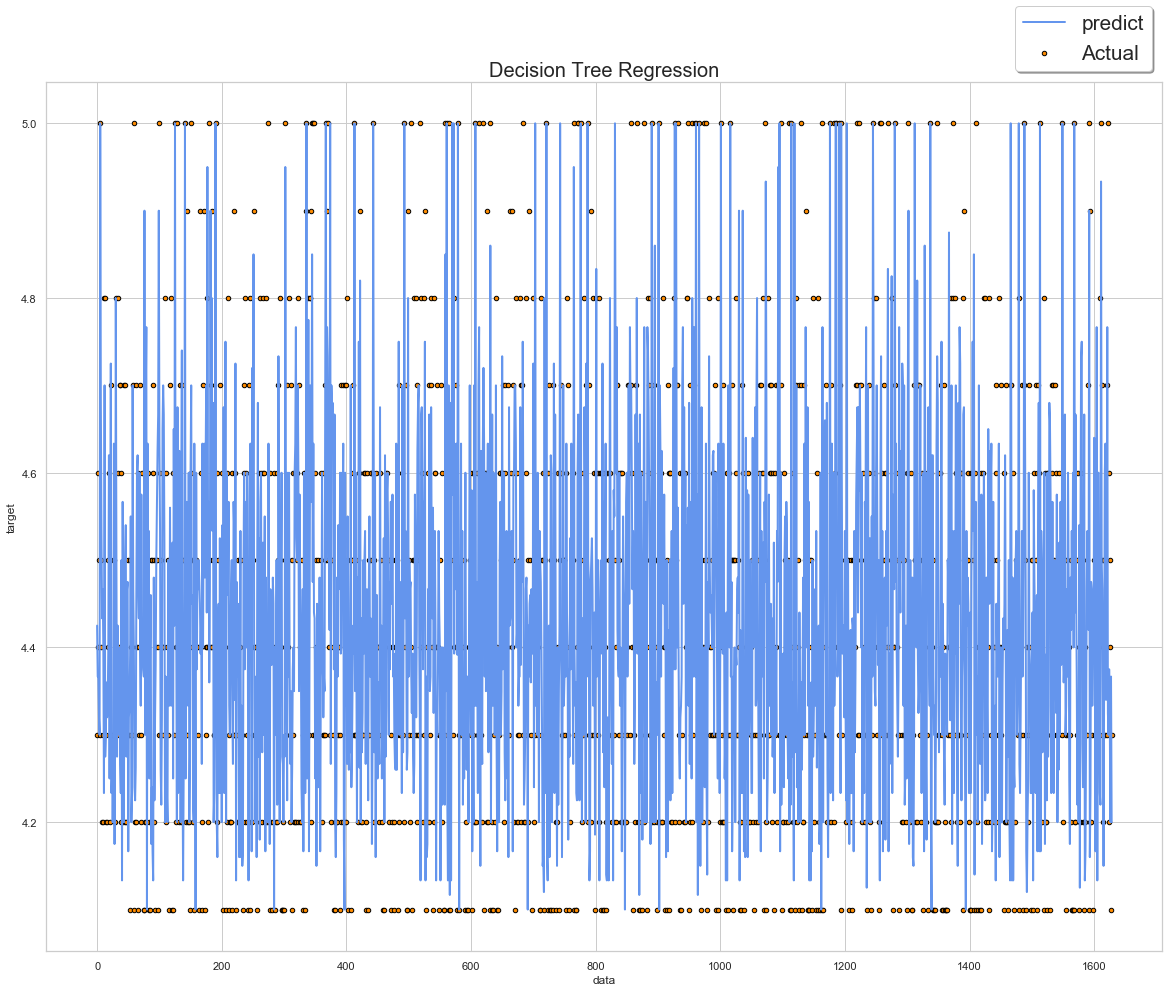

In [79]:
plt.figure(figsize=(20, 16))
plt.scatter(df_p['index_col'], yp_test, s=20, edgecolor="black",
            c="darkorange", label="Actual")
plt.plot(df_p['index_col'], yp_1, color="cornflowerblue",
         label="predict", linewidth=2)
#plt.plot(df_a['index_col'], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression", size = 20)
plt.legend(fontsize = 'xx-large',loc = 'lower right', shadow=True, bbox_to_anchor=(1, 1))
plt.show()

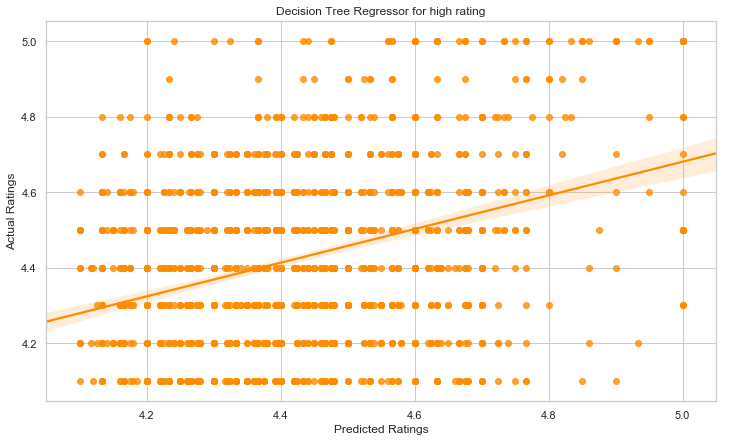

In [80]:
plt.figure(figsize=(12,7))
sns.regplot(yp_1,yp_test,color='darkorange')
plt.title('Decision Tree Regressor for high rating')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [81]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(yp_test,yp_1, name = 'Decision Tree Regressor-High rating'),ignore_index = True)
resultsdf

,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Series Name
0,0.380414,0.297918,0.015127,Linear Regressor
1,0.194916,0.056444,0.001875,Linear Regressor - High Rating
2,0.361327,0.274102,0.014051,Decision Tree Regressor
3,0.197998,0.061276,0.002062,Decision Tree Regressor-High rating


#### The mean accuracy goes up a lot, especially for the High-rating side. However, errors go up little bit, goes to next model

# Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)

In [83]:
#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'Random Forest Regressor'),ignore_index = True)
resultsdf

,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Series Name
0,0.380414,0.297918,0.015127,Linear Regressor
1,0.194916,0.056444,0.001875,Linear Regressor - High Rating
2,0.361327,0.274102,0.014051,Decision Tree Regressor
3,0.197998,0.061276,0.002062,Decision Tree Regressor-High rating
4,0.382815,0.306758,0.015381,Random Forest Regressor


In [84]:
model3.score(X_train, y_train)

0.8002625340217815

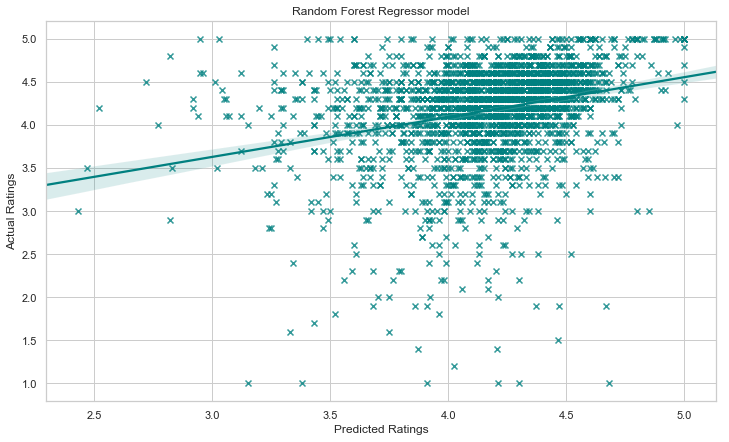

In [85]:
plt.figure(figsize=(12,7))
sns.regplot(Results3,y_test,color='teal', marker = 'x')
plt.title('Random Forest Regressor model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

#### For high rating

In [86]:
model3b = RandomForestRegressor()
model3b.fit(Xp_train,yp_train)
Results3b = model3b.predict(Xp_test)

In [87]:
#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(yp_test,Results3b, name = 'Random Forest Regressor-High rating'),ignore_index = True)
resultsdf

,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Series Name
0,0.380414,0.297918,0.015127,Linear Regressor
1,0.194916,0.056444,0.001875,Linear Regressor - High Rating
2,0.361327,0.274102,0.014051,Decision Tree Regressor
3,0.197998,0.061276,0.002062,Decision Tree Regressor-High rating
4,0.382815,0.306758,0.015381,Random Forest Regressor
5,0.177922,0.048336,0.001628,Random Forest Regressor-High rating


In [88]:
model3b.score(Xp_train, yp_train)

0.8402605267598435

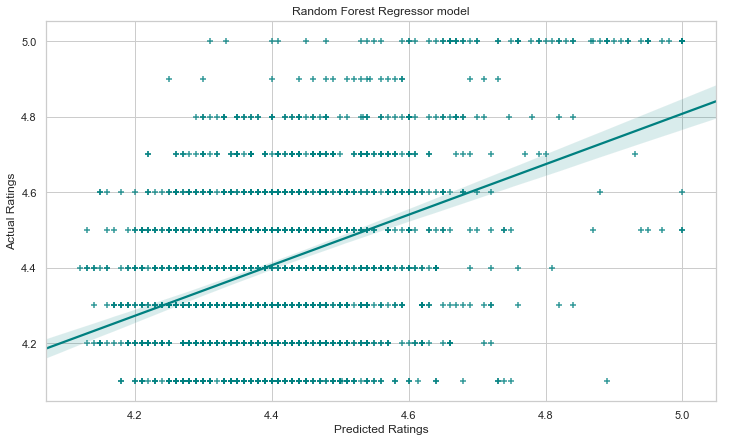

In [89]:
plt.figure(figsize=(12,7))
sns.regplot(Results3b,yp_test,color='teal', marker = '+')
plt.title('Random Forest Regressor model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

### Regression Result Conclusion

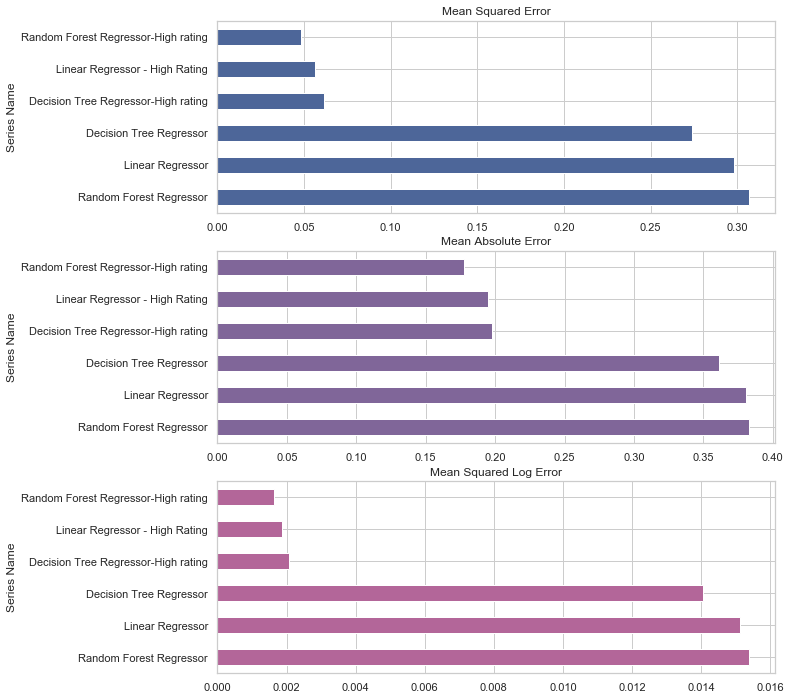

In [90]:
resultsdf.set_index('Series Name', inplace = True)

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
resultsdf['Mean Squared Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.4, 0.6, 1), 
                                                                    title = 'Mean Squared Error')
plt.subplot(3,1,2)
resultsdf['Mean Absolute Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.5, 0.4, 0.6, 1), title = 'Mean Absolute Error')
plt.subplot(3,1,3)
resultsdf['Mean Squared Log Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.7, 0.4, 0.6, 1), title = 'Mean Squared Log Error')
plt.show()

#### Hard to conclude which is the best predictive accuracy
#### Overall, the model for the high rating (rating >4) have more accuracy; And the Random Forest Regressor -  High rating have lowest error with high fit score. 